# Lab 3 – Cifrados Simétricos
### Javier Mombiela
### Carnet: 20067

#### Problema 1

In [1]:
from cifrados.block2 import *
import matplotlib.pyplot as plt

In [2]:
# Funcion para mostrar imagenes
def show_image(image_path):
    try:
        img = Image.open(image_path)

        plt.imshow(img)
        plt.axis('off') 
        plt.show()
    except Exception as e:
        print(f"Hubo un error al desplegar la imagen: {e}")

Mr. Increible

In [4]:
with open('./keys/mr-increible.key', 'rb') as f:
    increibleKey = f.read()

increibleImg = './images/mr-increible_encrypted_image.jpeg'
increible_decrypted = './images/mr-increible_decrypted_image.jpeg'

ecb_decrypt(increibleImg, increible_decrypted, increibleKey)
show_image(increible_decrypted)

b'\x9b`}<#\x11\\2\xc18'


ValueError: Padding is incorrect.

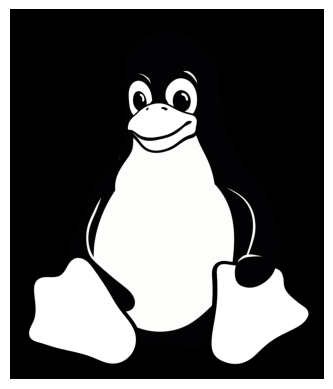

Hubo un error al desplegar la imagen: cannot identify image file './images/tuxECB.ppm'
b'j\x8e;\x1b\xe8p3\xf7u\xdd'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
Error: cannot identify image file <_io.BytesIO object at 0x7f04d05e2f40>
None None


TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [3]:
key = get_random_bytes(32)
tux = './images/tux.ppm'
tux_encrypted = './images/tuxECB.ppm'
tux_decrypted = './images/tuxECB_decrypted.ppm'

ecb_encrypt(tux, tux_encrypted, key)
show_image(tux)
show_image(tux_encrypted)

ecb_decrypt(tux_encrypted, tux_decrypted, key)
show_image(tux_decrypted)

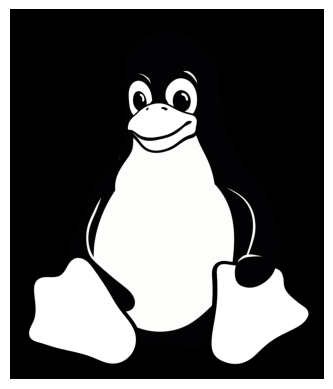

Hubo un error al desplegar la imagen: cannot identify image file './images/tuxCBC.ppm'


In [ ]:
key = get_random_bytes(32)
tux = './images/tux.ppm'
tux_encrypted = './images/tuxCBC.ppm'
tux_decrypted = './images/tuxCBC_decrypted.ppm'

cbc_encrypt(tux, tux_encrypted, key)
show_image(tux)
show_image(tux_encrypted)

# cbc_decrypt(tux_encrypted, tux_decrypted, key)
# show_image(tux_decrypted)